<a href="https://colab.research.google.com/github/pskr0/mini/blob/master/ARIMA_RAIL_GURU_SAMPLE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ARIMA_RAIL GURU


In [69]:
pip install pyramid-arima

            Unnamed: 1  Unnamed: 2  Unnamed: 3  w
Month                                            
1/2/2018           NaN         NaN         NaN  7
1/3/2018           NaN         NaN         NaN  8
1/4/2018           NaN         NaN         NaN  5
1/5/2018           NaN         NaN         NaN  4
1/8/2018           NaN         NaN         NaN  2
...                ...         ...         ... ..
10/10/2018         NaN         NaN         NaN  5
10/11/2018         NaN         NaN         NaN  5
10/12/2018         NaN         NaN         NaN  4
10/15/2018         NaN         NaN         NaN  6
10/16/2018         NaN         NaN         NaN  4

[200 rows x 4 columns]


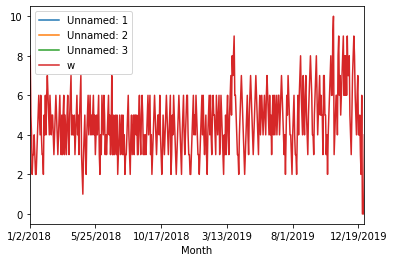

In [70]:
# line plot of time series
from pandas import read_csv
from matplotlib import pyplot
from pyramid import auto_arima
# load dataset
series = read_csv('/content/drive/My Drive/ML DATA/train_sample.csv', header=0, index_col=0)
# display first few rows
print(series.head(200))
# line plot of dataset
series.plot()
pyplot.show()

In [71]:
# split the dataset
from pandas import read_csv
series = read_csv('/content/drive/My Drive/ML DATA/train_sample3.csv', header=0, index_col=0)
split_point = len(series) - 7
dataset, validation = series[0:split_point], series[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv', index=False)
validation.to_csv('validation.csv', index=False)

Dataset 146, Validation 7


In [0]:
# create a differenced series
def difference(dataset, interval=1):                        
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return numpy.array(diff)

In [0]:
# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]

In [74]:
#divide the sample data into two parts
# Training and Testing Part
train=series[:int(0.8*(len(series)))]
test=series[int(0.8*(len(series))):]
print(train.shape)
print(test.shape)

(122, 1)
(31, 1)


In [75]:
model = auto_arima(train,trace=True,start_p=0,
                   start_q=0,start_P=0,start_Q=0,
                   max_p=10,max_q=10,max_P=10,
                   max_Q=10,seasonal=True,
                   stepwise=False,suppress_warnings=True,
                   D=1,max_D=10,error_action='ignore',
                   approximation = False)
#fitting model
model.fit(train)

Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=470.963, BIC=476.555, Fit time=0.012 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=456.898, BIC=465.285, Fit time=0.096 seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=436.356, BIC=447.539, Fit time=0.253 seconds
Fit ARIMA: order=(0, 1, 3) seasonal_order=(0, 0, 0, 1); AIC=437.015, BIC=450.994, Fit time=0.358 seconds
Fit ARIMA: order=(0, 1, 4) seasonal_order=(0, 0, 0, 1); AIC=439.015, BIC=455.789, Fit time=0.511 seconds
Fit ARIMA: order=(0, 1, 5) seasonal_order=(0, 0, 0, 1); AIC=439.334, BIC=458.905, Fit time=0.639 seconds
Fit ARIMA: order=(0, 1, 6) seasonal_order=(0, 0, 0, 1); AIC=440.154, BIC=462.520, Fit time=0.751 seconds
Fit ARIMA: order=(0, 1, 7) seasonal_order=(0, 0, 0, 1); AIC=439.651, BIC=464.813, Fit time=0.934 seconds
Fit ARIMA: order=(0, 1, 8) seasonal_order=(0, 0, 0, 1); AIC=437.173, BIC=465.130, Fit time=0.613 seconds
Fit ARIMA: order=(0, 1, 9) seasonal_order=(0, 0, 0, 1);

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(2, 1, 8),
      out_of_sample_size=0, scoring='mse', scoring_args={},
      seasonal_order=(0, 0, 0, 1), solver='lbfgs', start_params=None,
      suppress_warnings=True, transparams=True, trend='c')

In [76]:
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
import numpy
 
# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return numpy.array(diff)
 
# load dataset
series = read_csv('/content/drive/My Drive/ML DATA/train_sample.csv', header=None)
# seasonal difference
X = series.values
days_in_year = 365
differenced = difference(X, days_in_year)
# fit model
model = ARIMA(differenced, order=(7,0,7))
model_fit = model.fit(disp=0)
# print summary of fit model
print(model_fit.summary())

TypeError: ignored